# 2. Neural Network From Scratch
> A tutorial for beginners with Pytorch and FASTAI you can create your own classifier.

- toc: true 
- badges: true
- comments: true
- author: HAFIZ AHMAD HASSAN & Jeremy Howard
- categories: [jupyter]
- image: images/chart-preview.png

## Neural Network From Scratch Using Pytorch and FAST.AI Capabilities
This tutorial is created from Lecture 4 from FAST ai Course **Deep Learning from coders** Course
I will go through step by step how to build Classifier using pytorch from scratch.



## Import Packages
Un comment "!pip install -Uqq fastbook" install if running colab


In [3]:
# Un comment pip install if running colab
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Download Dataset
Using Fastai function with **untardata** we are downloading images of 3s and 7s from MNIST dataset
it is downloaded as zip file where function unzip it

In [10]:
path = untar_data(URLs.MNIST_SAMPLE)

In [11]:
path

Path('/home/hassan/.fastai/data/mnist_sample')

## Point to Current Directory to Path

In [12]:
Path.BASE_PATH = path

## Lets see whats inside Path
ls is special funtion which returns name of folder inside the path and number of folders as #x where x is count


In [13]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [14]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [15]:
sevens = (path/'train'/'7').ls().sorted()
threes = (path/'train'/'3').ls().sorted()


In [16]:
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

## Differnet methods to See Pic

Picture is actually represented as matrix of 3 dimension i.e (x,y,z) where z=1 or null in case of grey scale Usually it is 2 dimention
and z=3 in case of RBG (colored image) and x and y are real numbers

Lets do following
1. Read/Get a path of image
2. Pass it to Image opener by python library

In [17]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

## See image as Array

In [18]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

## Tensors are Array in Pytorch
The 4:10 indicates we requested the rows from index 4 (included) to 10 (not included)

In [19]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

## Lets see image in a fancy way
1. Tensor casted as python data frame and style property allow us to visualise it in a good way

In [20]:
pd.DataFrame(tensor(im3)[4:15,3:22]).style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## Images as Tensor List
1. Iterate through all paths of images 3/7
2. open it as an images
3. cast it to tensor
4. Store it as list

In [21]:
sevens_list = [tensor(Image.open(o)) for o in sevens]
threes_list = [tensor(Image.open(o)) for o in threes]

In [22]:
type(sevens_list), type(sevens_list[0])

(list, torch.Tensor)

<AxesSubplot:>

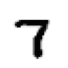

In [23]:
show_image(sevens_list[0])

## Lets Store it as Tensor Stack 

In [24]:
sevens_stack = torch.stack(sevens_list).float()/255
threes_stack = torch.stack(threes_list).float()/255

In [25]:
type(sevens_stack)

torch.Tensor

## Compare the types above

In [26]:
type(sevens_list), type(sevens_list[0])

(list, torch.Tensor)

## Put All things Together for Validation

In [27]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

# Prepare Training Data

In [28]:
type([sevens_stack, threes_stack]) ,len([sevens_stack, threes_stack])

(list, 2)

### Lets Reshape images to Dimenstion 1

In [29]:
train_x = torch.cat([sevens_stack, threes_stack]).view(-1,28*28)

In [30]:
type(train_x),type(train_x[0]), train_x.shape

(torch.Tensor, torch.Tensor, torch.Size([12396, 784]))

### Prepare Labels
1. I want to have all sevens as 0
2. all threes as 1
3. with Unsequeeze I can have **Row vector** See what is row vector in google

In [31]:
train_y = tensor([0]*len(sevens_stack) + [1]*len(threes_stack)).unsqueeze(1)

## Pytorch Data Set
A `Dataset` in PyTorch is required to return a tuple of `(x,y)` when indexed. Python provides a `zip` function which, when combined with `list`, provides a simple way to get this functionality:

In [32]:
dset = list(zip(train_x,train_y))

In [33]:
x,y = dset[0]

In [34]:
x.shape,y.shape

(torch.Size([784]), torch.Size([1]))

## Prepare Testing Data
Same as training data preperation

In [35]:
valid_x = torch.cat([valid_7_tens ,valid_3_tens]).view(-1,28*28)
valid_y = tensor([0]*len(valid_7_tens )+ [1]* len(valid_3_tens)).unsqueeze(1)
valid_dset=list(zip(valid_x,valid_y))

In [36]:
valid_x.shape,valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

## Data Loaders : Pytorch API
Lets Explore what is it
1. Lets see capability of batching -mini batch

In [37]:
dl = DataLoader(range(15), batch_size=5,shuffle=True)

In [38]:
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [39]:
ds=DataLoader(L(enumerate(string.ascii_lowercase)), batch_size=5, shuffle=True)

In [40]:
list(ds)

[(tensor([17, 18, 10, 22,  8]), ('r', 's', 'k', 'w', 'i')),
 (tensor([14, 20, 15,  9, 13]), ('o', 'u', 'p', 'j', 'n')),
 (tensor([21, 12,  7, 25,  6]), ('v', 'm', 'h', 'z', 'g')),
 (tensor([ 5, 11, 23,  1,  3]), ('f', 'l', 'x', 'b', 'd')),
 (tensor([ 0, 24, 19, 16,  2]), ('a', 'y', 't', 'q', 'c')),
 (tensor([4]), ('e',))]

## DataLoaders
A DataLoader can be created from a Dataset

In [41]:
dl = DataLoader(dset, batch_size=256,shuffle=True)
xb, yb = first(dl)

In [42]:
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [43]:
#iter(dl)
type(valid_dset),len(valid_dset[0])

(list, 2)

In [44]:
valid_dl = DataLoader(valid_dset, batch_size=256,shuffle=True)
v_xb, v_yb = first(valid_dl)

## Initialise Parameters
1. Lets create a function pass parameters to which we require gradient
2. weights and biases are are to be initialise


In [45]:
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()

In [46]:
weights = init_params((28*28,1))

In [47]:
bias = init_params(1)

## Forward Pass
matrix multiplication plus bias

In [48]:
def linear1(x): return x@weights +bias
    

# First Batch
Lets look at this
First function take a first minibatch created by data loaders

In [49]:
xb, yb = first(dl)

In [50]:
preds = linear1(train_x)

In [51]:
preds=linear1(xb)

In [52]:
yb.shape,train_y.shape

(torch.Size([256, 1]), torch.Size([12396, 1]))

In [53]:
train_y

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]])

In [54]:
#collapse-output
yb

tensor([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],

## Step Function as an Activation

Here we have step function as activation
**Predictions which are greater than 0.5 are considered one class another is second**

In [55]:
corrects =(preds>0.5).float() == yb

In [56]:
#corrects

In [57]:
corrects.float().mean().item()

0.40625

## Loss Calculations

since we want to restrict our prediction to range [0-1] as we have labels 0 for seven class and 1 for three class

In [58]:
def mnist_loss(predictions,targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, (1-predictions), predictions).mean()

In [59]:
loss = mnist_loss(corrects,yb)

## Claculate Gradient
1. take predictions
2. calculate loss
3. derivative of loss w.r.t parameters : weights and bias

In [60]:
def calc_grad(x,y,model):
    preds = model(x)
    loss = mnist_loss(preds,y)
    loss.backward()
    

In [61]:
calc_grad(xb,yb,linear1)

In [62]:
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0013), tensor([-0.0049]))

## Why Grad_zero_?

Our only remaining step is to update the weights and biases based on the gradient and learning rate. When we do so, we have to tell PyTorch not to take the gradient of this step too—otherwise things will get very confusing when we try to compute the derivative at the next batch! If we assign to the data attribute of a tensor then PyTorch will not take the gradient of that step. Here's our basic training loop for an epoch

In [63]:
weights.grad.zero_(),bias.grad.zero_();

In [64]:
def train_epoch(model,lr,params):
    for x,y in dl:
        calc_grad(x,y,model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

batch accuracy used to evaluate model

In [65]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [66]:
batch_accuracy(linear1(xb), yb)

tensor(0.4102)

In [67]:
def validate_epoch(model):
    accs = [batch_accuracy(model(v_xb), v_yb) for v_xb,v_yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [68]:
validate_epoch(linear1)

0.4655

## Lets Start out Training
1. learning rate here 10 to power -1
2. validate used to evaluate model on validation data

In [69]:
lr = 1e-1
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5633

In [70]:
#collapse-output
for i in range(400):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.7051 0.7993 0.8414 0.8735 0.8907 0.9004 0.9122 0.9205 0.9275 0.9319 0.9362 0.9367 0.9373 0.9396 0.9417 0.9431 0.9445 0.9445 0.9465 0.9466 0.9494 0.9499 0.9509 0.9519 0.9545 0.9559 0.9559 0.9559 0.9564 0.9572 0.9587 0.9588 0.9597 0.9607 0.9608 0.9627 0.9627 0.9632 0.9637 0.9642 0.9642 0.9641 0.9646 0.9647 0.9651 0.9657 0.9656 0.9661 0.9657 0.9661 0.9667 0.9667 0.9667 0.9666 0.9676 0.9675 0.9676 0.9681 0.9686 0.9686 0.9686 0.9691 0.9692 0.9691 0.969 0.9695 0.9695 0.97 0.9701 0.9701 0.97 0.9701 0.9701 0.9701 0.971 0.9711 0.9716 0.9715 0.9721 0.972 0.972 0.9726 0.9726 0.9725 0.9726 0.9726 0.9725 0.9725 0.9725 0.9726 0.9726 0.9723 0.9725 0.9736 0.9735 0.974 0.974 0.974 0.9745 0.9745 0.9745 0.9745 0.9749 0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.9749 0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.9754 0.9754 0.9755 0.9754 0.9755 0.9754 0.9755 0.9755 0.976 0.9765 0.9765 0.9765 0.9765 0.9764 0.9765 0.9764 0.9764 0.9764 0.9765 0.9765 0.9765 0.9764 0.9765 0.9765 0.9764 0

## Using Python Class

Using same 'nn.linear' module inherits object pytorch class 'nn.Linear'

nn.Linear does the same thing as our **init_params** and **linear** together. It contains both the weights and biases in a single class. Here's how we replicate our model from the previous section:

In [86]:
linear_model =nn.Linear(28*28,1)

In [87]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [88]:
class BasicOpt:
    #class contains two attributes params=weights,bias and learning rate
    # get all the parameters
    def __init__(self, params,lr): self.params, self.lr = list(params),lr
    # gradient
    def step(self, *args, **kwargs): 
        for p in self.params:
            p.data -= p.grad.data * self.lr
    # zero grad
    def zero_grad(self, *args , **kwargs):
        for p in self.params:
            p.grad = None

In [89]:
opt = BasicOpt(linear_model.parameters(), lr=1e-1)

In [94]:
def train_epoch(model):
    for x,y in dl:
        calc_grad(x,y,model)
        opt.step()
        opt.zero_grad()

In [95]:
validate_epoch(linear_model)

0.6556

In [96]:
def train_model(model,epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(linear_model),end=" " )

In [97]:
train_model(model=linear_model, epochs = 10)

0.9657 0.9672 0.9676 0.9686 0.9695 0.9706 0.9706 0.9711 0.9716 0.972 

In [98]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr =1e-1)
train_model(linear_model,20)

0.9651 0.9657 0.9687 0.9701 0.9695 0.9705 0.9706 0.971 0.9721 0.973 0.9729 0.973 0.973 0.974 0.9745 0.975 0.9755 0.9754 0.9754 0.9754 

In [86]:
dls = DataLoaders(dl, valid_dl)

To create a `Learner` without using an application (such as `cnn_learner`) we need to pass in all the elements that we've created in this chapter: the `DataLoaders`, the model, the optimization function (which will be passed the parameters), the loss function, and optionally any metrics to print:

In [87]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

Now we can call `fit`:

In [88]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.154314,0.093394,0.967125,00:00
1,0.097860,0.069815,0.967615,00:00
2,0.074141,0.059789,0.969578,00:00
3,0.062189,0.054248,0.970069,00:00
4,0.054846,0.050518,0.970069,00:00
5,0.049594,0.047826,0.970559,00:00
6,0.045887,0.045634,0.970559,00:00
7,0.043330,0.044017,0.970559,00:00
8,0.041645,0.042539,0.972031,00:00
9,0.039802,0.041379,0.972031,00:00
